In [1]:
using Plots
using LaTeXStrings, ColorSchemes

include("./Library.jl")

In [2]:
#Init the Agent
start = (0.0, 0.0)
goal = (10.0, 10.0)
T = d(start, goal) #Total time length of the trajectory, fixed such that with v = 1 the agent will arrive at the goal
δt = 0.01 #discretization step of the trajectory
α = 1.0 #in
γ = 0.001

a = Create_Agent(start, goal, δt, T, α, γ)
Init_Initial_Guess!(a)

In [13]:
#Init the Obstacles
#positions
x_Elements = [(1.1, 1.0), (4.5, 4.0), (7.5, 8.0), (2.0, 2.0)]
#sizes
l_Elements = [0.3, 0.4, 0.9, 0.3]

obstacle = Create_Geometry(x_Elements, l_Elements);

In [14]:
obstacle

geometry(element[element((1.1, 1.0), 0.3), element((4.5, 4.0), 0.4), element((7.5, 8.0), 0.9), element((2.0, 2.0), 0.3)])

In [24]:
#Run the Optimization
steps = 4000
Δsteps_saved = 800

trajectories = Run_Ordered_Optimization(a, obstacle, steps, Δsteps_saved);

In [25]:
#Calc η matrix for plotting
x = collect(-1.0:0.01:11.0)
y = collect(-1.0:0.01:11.0)

η_Matrix = Calc_η_Matrix(x, y, obstacle);

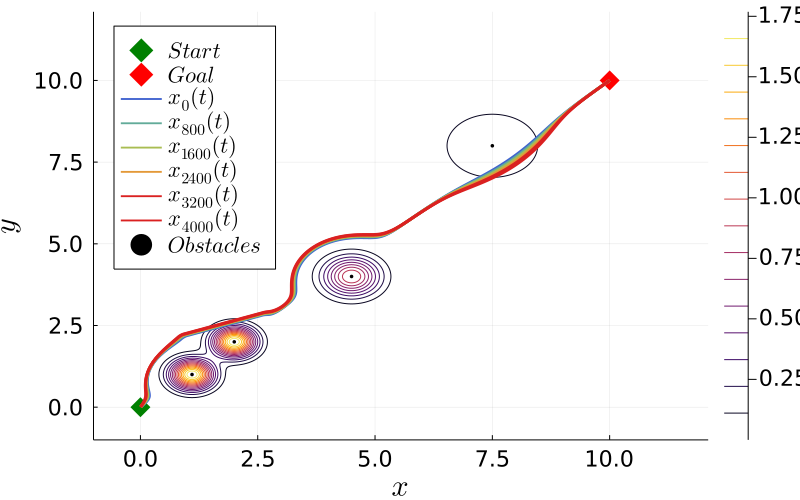

In [26]:
#plot the result
Plots.scalefontsizes()
Plots.scalefontsizes(2)


plot(layout=(1,1), legend=:topleft, legendfontsize = 15,
    xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20)

contour!(x, y, η_Matrix, fill = false)
#scatter!(a.traj, label = L"\vec{x}_0", markersize = 3, msw = 0, color=:blue)
scatter!(a.start, label = L"Start", markersize=10, msw = 0, shape=:diamond, color =:green)
scatter!(a.goal, label = L"Goal", markersize=10, msw = 0, shape=:diamond, color =:red)

for i in 1:size(trajectories)[1]
    label_i = latexstring("x_{", (i-1)*Δsteps_saved, "}(t)")
    c = get(ColorSchemes.rainbow, i./(size(trajectories)[1]-1))
    plot!(trajectories[i, :], label = label_i, linewidth = 3, color = c)
end

scatter!(obstacle.element[1].x, color = "black", markersize=2, msw = 0, label = L"Obstacles")

for o in obstacle.element[2:end]
    scatter!(o.x, color = "black", markersize=2, msw = 0, label = false)
end



plot!(xlabel=L"x") 
plot!(ylabel=L"y")

plot!(ylims = (-1.0, 12.1))
plot!(xlims = (-1.0, 12.1))


plot!(size=(800,500))